In [1]:
import numpy as np
from gene_tr import array,GeneratePhasesfromtrajectories
from Evaluation import *
from KF import *
from Basic import *
from EKF import *

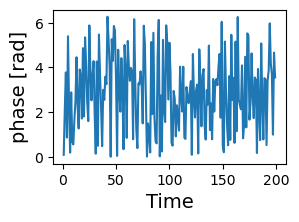

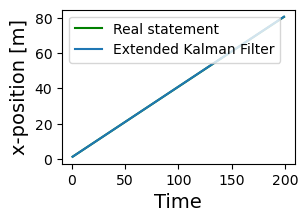

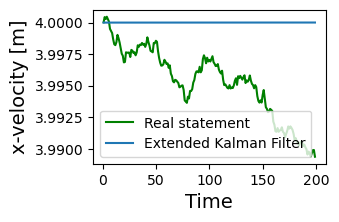

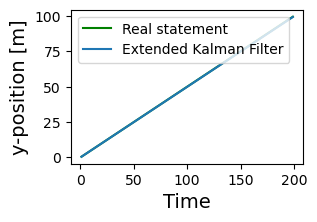

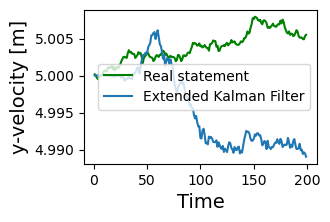

In [2]:
f=8.6e8
lmb = 3e8/f
#Array
N=10 # number of elements
d=0.25*lmb # distance between 2 adjacent elements
arr_dim=d*(N-1) # dimension of the array
arr=array(N,arr_dim,0) # array elements location
#parameters
dt = 0.1
F_1 = np.array([[1, dt], [0, 1]])
q=0.001
Q_1 =  (q**2)*np.array([[(dt**3)/3,(dt**2)/2],[(dt**2)/2,dt]]) 
r=1

zero_2_2=np.zeros([2,2])
zero_1_2=np.zeros([1,2])
F = np.block([[F_1,zero_2_2],[zero_2_2,F_1]])
Q = np.block([[Q_1,zero_2_2],[zero_2_2,Q_1]])
R = r*np.eye(N)
# Initialization
P0 = np.zeros([4,4])
x0=np.random.multivariate_normal(mean=(1,4,0,5),cov=P0).reshape(4,1)


#generate trajectories  

Length=200
real_states = []

x = x0
for i in range(Length):
    real_states.append(x)
    x = np.dot(F,x)+np.random.multivariate_normal(mean=(0,0,0,0),cov=Q).reshape(4,1)
real_states = np.array(real_states)


real_states=real_states.reshape([1,Length,4])
phase_offset=2
Phases=GeneratePhasesfromtrajectories(1,Length,arr,lmb,phase_offset,real_states,1)

real_state=real_states[0,:,:]
phases=Phases[0,:,:]

phases=np.array(phases)
real_state=np.array(real_state)

# filter_result = EKF_v0(Length,dt,x0,P0,F,Q,R,arr,lmb,phases)
# plot_result(phases,real_state,filter_result)

filter_result1 = EKF_v1(Length,dt,x0,P0,F,Q,R,arr,lmb,phases)
plot_result(phases,real_state,filter_result1)


# filter_result2 = EKF_v2(Length,dt,x0,P0,F,Q,R,arr,lmb,phases)
# plot_result(phases,real_state,filter_result2)